# VBM661 Veri Görşelleştirilmesi
### Final Sınav Raporu



## Erasmus Öğrenci Hareketliliği Veri Setinin Görselleştirlmesi


---


Ahmet Alperen YILDIRIM
N22136365

# Zamansal Veri Görselleştirmesi Uygulaması

In [ ]:
# Geopandas kütüphanesinin colab'a yüklenmesi.
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Görselleştirme için gereken kütüphanlerin çağırılması.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import geopandas as gpd
import plotly as py
import plotly.express as px

In [ ]:
# Veri setim olan Erasmus hareketliliği verisinin pandas ile okunması ve tarih verisinin dönüştürülmesi.
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-03-08/erasmus.csv')
df['mobility_start_month'] = pd.to_datetime(df['mobility_start_month'])
df['mobility_end_month'] = pd.to_datetime(df['mobility_end_month'])
# Veri setinin tarihe göre katılımcıların sayısının gruplanması. Bu sayede tarih özelinde kaç katılımcı olduğunun elde edilmesi. 
df1 = df.groupby('mobility_start_month', as_index= False).count()
df.head()

,project_reference,academic_year,mobility_start_month,mobility_end_month,mobility_duration,activity_mob,field_of_education,participant_nationality,education_level,participant_gender,...,participant_age,sending_country_code,sending_city,sending_organization,sending_organisation_erasmus_code,receiving_country_code,receiving_city,receiving_organization,receiving_organisation_erasmus_code,participants
0,2014-1-AT02-KA347-000139,2014-2015,2014-11-01,2014-11-01,1,National youth meetings,? Unknown ?,AT,??? - ? Unknown ?,Female,...,13,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,2
1,2014-1-AT02-KA347-000139,2014-2015,2014-11-01,2014-11-01,1,National youth meetings,? Unknown ?,AT,??? - ? Unknown ?,Female,...,14,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,3
2,2014-1-AT02-KA347-000139,2014-2015,2014-11-01,2014-11-01,1,National youth meetings,? Unknown ?,AT,??? - ? Unknown ?,Female,...,15,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,3
3,2014-1-AT02-KA347-000139,2014-2015,2014-11-01,2014-11-01,1,National youth meetings,? Unknown ?,AT,??? - ? Unknown ?,Male,...,14,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,4
4,2014-1-AT02-KA347-000139,2014-2015,2014-11-01,2014-11-01,1,National youth meetings,? Unknown ?,AT,??? - ? Unknown ?,Male,...,15,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,AT,Dornbirn,bOJA - Bundesweites Netzwerk Offene Jugendarbeit,-,2


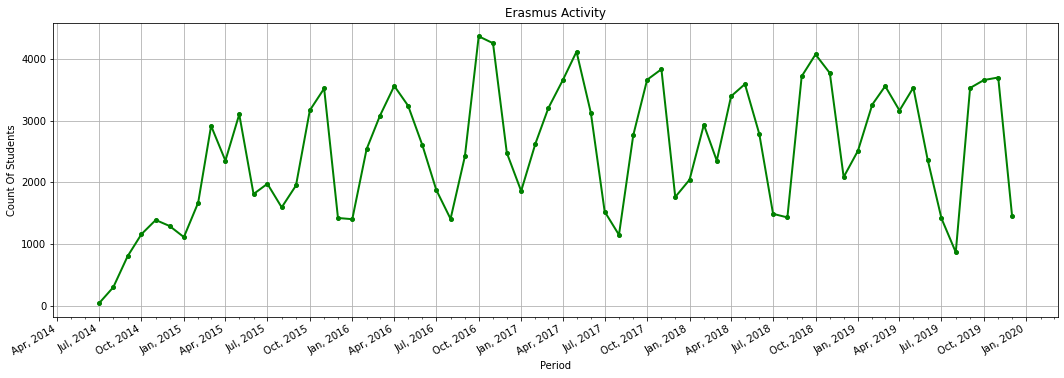

In [ ]:
# tarih ve gruplanmış katılımcı sayısının tanımlanması.
date = df1.mobility_start_month
value = df1.academic_year

fig, ax = plt.subplots(figsize=(18, 6))
half_year_locator = mdates.MonthLocator(interval=3) # 3 aylık periodlar ile veri değerlerinin tanımlanması
month_year_formatter = mdates.DateFormatter('%b, %Y') # Tarih formatının ay adı ve yıl olarak tanımlanması.
monthly_locator = mdates.MonthLocator()

ax.xaxis.set_major_locator(half_year_locator) # 3 aylık periodlar ile veri değerlerinin grafikte gösterilmesi.
ax.xaxis.set_minor_locator(monthly_locator) 
ax.xaxis.set_major_formatter(month_year_formatter) # Tarih formatının ay adı ve yıl olarak güncellenmesi.

# X ve Y ekseninin tanınmlanması, grafiğin isimlendirilmesi
ax.set_xlabel('Period')
ax.set_ylabel('Count Of Students')  
ax.set_title("Erasmus Activity") 

# Çizgi grafiğinin nokta şekilde marker(go) ve kesiksiz(-) çizgi olarak tanımlanması.
# Çizgi kalınlığı ve marker ebatının tanımlanması.
ax.plot(date, value,'go-',linewidth =2, markersize = 4) 

plt.grid() # Grid tanımlanması.
fig.autofmt_xdate() # Tarihin tanımlanması.


Bu zamansal görselleştirmede çizgi grafiği kullanılarak ile, 3 aylık tarih dönemlerini X ekseninde getirerek öğrenci hareketliliğinin dönemselliği görselleştirilmiştir. İşaretleyici olarak nokta kullanılmıştır.


*   2014 yılından sonra öğrenci sayısında artış gözükmektedir.
*   En çok hareketlilik, ders dönemleriyle doğrudan ilişkili olarak Şubat ve Ekim aylarında meydana gelmektedir.
*   En düşük aylarda 1500 öğrenci, en yüksek döneminde ise 4200 öğrencinin katılımı ile gerçekleşmiştir. 








# Mekansal Veri Görselleştirmesi Uygulaması

In [ ]:
# Veri setine mekansal bilgi ekleyebilmek ve cvs olarak okuyabilmek için github profilime 'Cities' verisini yükledim. 
df_cities = pd.read_csv("https://raw.githubusercontent.com/yildirimalperen/world_cities/main/worldcities.csv")
df_cities["sending_city"] = df_cities["city"]
df_cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,sending_city
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764,Tokyo
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077,Jakarta
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604,Delhi
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140,Manila
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519,São Paulo


In [ ]:
# Şehirler verisine, Erasmus veri setimdeki şehirleri eşleştikleri kolon için ekledim.
first_merge = df_cities.join(df, lsuffix= "iso2" , rsuffix="receiving_country_code")

In [ ]:
# Değer gelmeyen verilerden temizlemek için notnull ile filtreledim ve öğrencileri sayabilmek için grupladım.
my_merge = first_merge[first_merge["sending_country_code"].notnull()].groupby("iso3", as_index=False).count()

In [ ]:
# Veride polygon değerleri olmadığı için ek bir verisetini github profilime yükledim ve geopandas olarak okudum.
gdf = gpd.read_file("https://raw.githubusercontent.com/yildirimalperen/world_cities/main/world-administrative-boundaries.geojson")

In [ ]:
# İlk eklenmiş veriye geometri datasını da ekledim. Bu sayede öğrenci sayıları ile geomteri verisini birleştirdim.
merged = gdf.join(my_merge, lsuffix="iso3color_code", rsuffix='iso3')

In [ ]:
# Birleşme sonrası eşleşmeyen değerleri temizledim.
new_merged= merged[merged['participants'].notnull()]

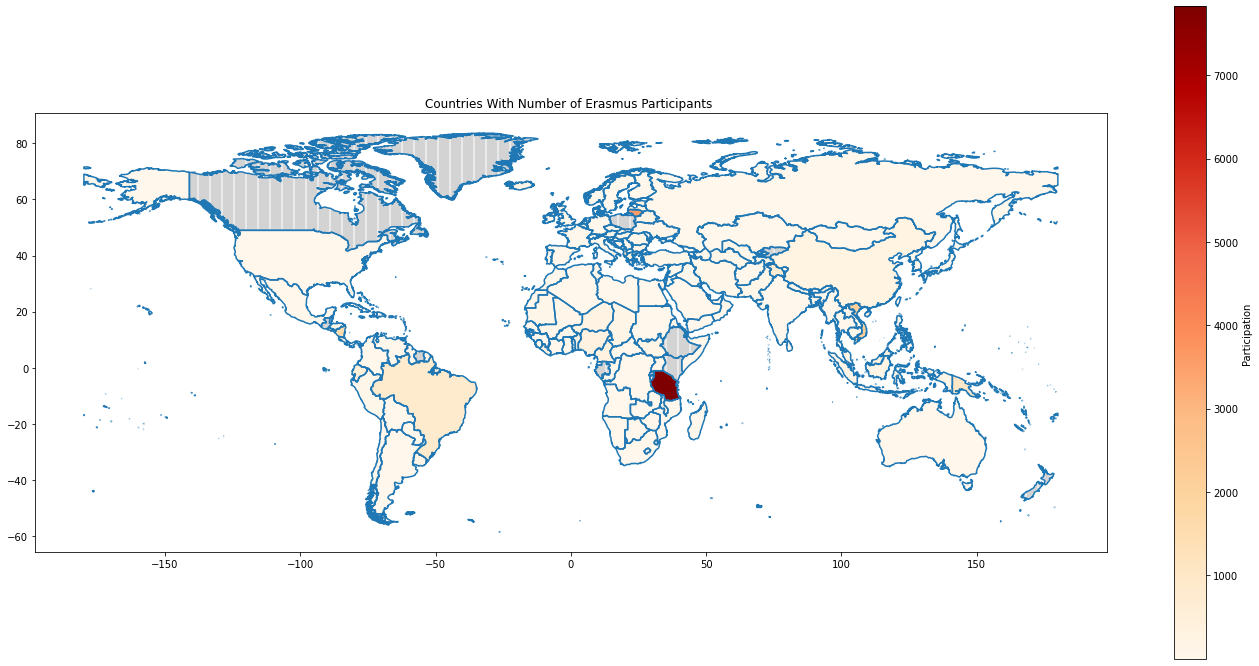

In [ ]:
ax = merged["geometry"].boundary.plot(figsize=(24,12)) # Geometri verisinin sınırlarının görselleştirilmesi.
merged.plot( column="participants", ax=ax, cmap='OrRd', # Ülkelere göre gruplanmış katılımcı sayısının Turuncu tonlarında görselleştirilmesi.
            legend=True,legend_kwds={"label": "Participation"}, # Legend için katılımcı tanımlanması.
            missing_kwds={"color": "lightgrey", "edgecolor": "white", "hatch": "|"}) # Değer gelmeyen ülkelerin gösterilmesi.
ax.set_title("Countries With Number of Erasmus Participants ") 
plt.show()

# İnteraktif Veri Görselleştirmesi Uygulaması

In [ ]:
# Plotly express kullanarak, hazırlamış olduğum veriyi, scatter_geo'da görselleştirdim.
# Ülkelerin öğrenci sayılarının yoğunluklarına göre imleçlerin ebatlarını değiştirdim. 
# Okunabilirliği arttırmak için renklerini farklıştırdım. 

fig = px.scatter_geo(new_merged, locations = "color_code", size = "participants", color ="color_code")
fig.update_layout(autosize=False, width=1200, height=600)
fig.show()


# Sonuç ve Dönem ile ilgili yorumlarım.




Bu dönem VBM661 dersimi tamamlarken, verinin tanımından başlayarak, insanın veriyi algılayışı, verinin anlamlandırılması ve görselleştirilmesinin profesyonel ve günlük hayatımızdaki yeri hakkında bilgi sahibi oldum. 

---
> Genel kültür ve anlayış olarak; görselleştirmenin 1700'lü yıllardan başlayıp, insan ihtiyacı doğrultusunda evrimleşerek günümüze gelerek günlük hayatta kullandığım uygulamalarda ve okuduğum haber içerikli görselleştirmelerde nelere dikkat edildiği konusunda bakış açısı edindim. Maps, Uber, Sahibinden gibi uygulamaların hangi tabanda çalıştığını ve nasıl bir çalışma gerektiğini çok daha iyi kafamda canlandırabiliyorum. 
---
> Yazılımla ilgili olarak; Tableau, Metabse, PowerBI gibi görselleştirme araçlarının nasıl bir mantıkla çalıştığını, matplotlib, plotly gibi kütüphaneleri tecrübe ederek daha net anlayabildim. Günlük işimde de Metabase kullanıyorum ve oradaki interaktif göselleştirmelerin hangi tabanda çalıştığını daha net anlayabildim.
---
> Teknik olarak, veri çeşitleri ve çeşitlere göre yapılması gereken görselleştime yöntemlerini ve türlerini öğrendim. Paylaştığınız spark ve genel kaynakları da ilerleyen dönemde ihtiyaç duydukça erişmek üzere yedekledim ve çevrem ile paylaşıyorum.

Emeğiniz ve paylaşımlarınız için teşekkür ederim Engin Hocam.

